In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("datasets/data_with_nans.csv")

In [3]:
data.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     170 non-null    int64  
 1   Id             170 non-null    int64  
 2   SepalLengthCm  167 non-null    float64
 3   SepalWidthCm   169 non-null    float64
 4   PetalLengthCm  166 non-null    float64
 5   PetalWidthCm   168 non-null    float64
 6   Species        170 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 9.4+ KB


## Gereksiz Kolonların Düşürülmesi

In [5]:
data.columns

Index(['Unnamed: 0', 'Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'],
      dtype='object')

In [6]:
data.drop(data.columns[0], axis=1, inplace=True)

In [7]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,170.0,84.500000,49.218899,0.0,42.25,84.5,126.75,169.0
SepalLengthCm,167.0,5.826347,0.827189,4.3,5.10,5.8,6.40,7.9
SepalWidthCm,169.0,3.072781,0.447578,2.0,2.80,3.0,3.40,4.4
PetalLengthCm,166.0,3.707229,1.789382,1.0,1.50,4.3,5.10,6.9
PetalWidthCm,168.0,1.180357,0.765049,0.1,0.30,1.3,1.80,2.5


In [9]:
data.groupby("Species").agg(["min","max","std","mean"])

Id                        SepalLengthCm                 \
                 min  max        std   mean           min  max       std   
Species                                                                    
Iris-setosa        0   59  17.464249   29.5           4.3  6.9  0.429014   
Iris-versicolor   60  113  15.732133   86.5           4.9  7.0  0.516189   
Iris-virginica   114  169  16.309506  141.5           4.9  7.9  0.650025   

                          SepalWidthCm                          PetalLengthCm  \
                     mean          min  max       std      mean           min   
Species                                                                         
Iris-setosa      5.034483          2.3  4.4  0.390709  3.389831           1.0   
Iris-versicolor  5.932075          2.0  4.4  0.382355  2.805556           1.5   
Iris-virginica   6.546429          2.2  3.9  0.355203  2.996429           1.3   

                                         PetalWidthCm                           
                 max       std      mean          min  max       std      mean  
Species                                                                         
Iris-setosa      5.4  0.639570  1.572414          0.1  2.1  0.295950  0.300000  
Iris-versicolor  5.1  0.623167  4.190385          0.4  1.8  0.235049  1.314815  
Iris-virginica   6.9  0.795195  5.469643          0.4  2.5  0.353215  1.992727

In [10]:
data.isna().sum()

Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64

In [11]:
for column in data.columns[1:-1]:
    data[column].fillna(value=data[column].mean(), inplace=True)

In [12]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
#ya da dropna ile veriden atabiliriz
data.dropna(axis=0, how='any', inplace=True)

## Veri Görselleştirme

In [14]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,2,4.9,3.1,1.5,0.1,Iris-setosa
3,3,4.4,2.9,1.4,0.2,Iris-setosa
4,4,5.0,3.4,1.5,0.2,Iris-setosa


<AxesSubplot:>

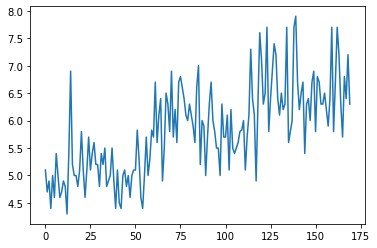

In [15]:
data['SepalLengthCm'].plot()

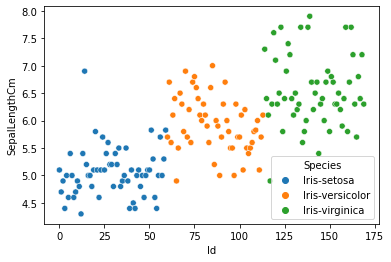

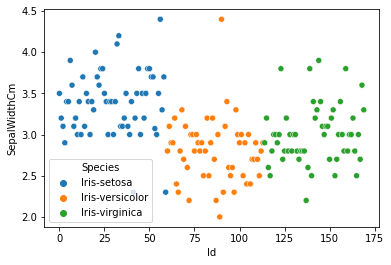

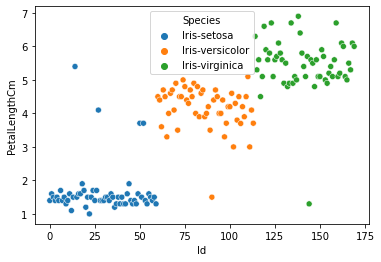

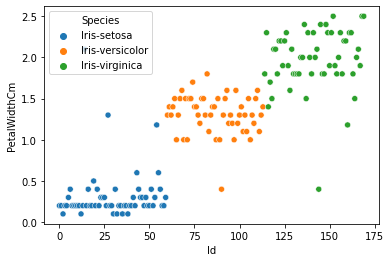

In [16]:
for column in data.columns[1:-1]:
    sns.scatterplot(data = data, x="Id", y=column, hue="Species")
    plt.show()

## Outlier Detection

## 3 Standart Sapma

In [17]:
selected_spec = data[data["Species"] == "Iris-setosa"]
selected_column = selected_spec["SepalLengthCm"]

In [18]:
selected_spec

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,1,4.700000,3.200000,1.600000,0.200000,Iris-setosa
2,2,4.900000,3.100000,1.500000,0.100000,Iris-setosa
3,3,4.400000,2.900000,1.400000,0.200000,Iris-setosa
4,4,5.000000,3.400000,1.500000,0.200000,Iris-setosa
5,5,4.600000,3.400000,1.400000,0.300000,Iris-setosa
6,6,5.400000,3.900000,1.700000,0.400000,Iris-setosa
7,7,5.000000,3.600000,1.400000,0.200000,Iris-setosa
8,8,4.600000,3.100000,1.500000,0.200000,Iris-setosa
9,9,4.700000,3.200000,1.300000,0.200000,Iris-setosa


In [19]:
selected_column

0     5.100000
1     4.700000
2     4.900000
3     4.400000
4     5.000000
5     4.600000
6     5.400000
7     5.000000
8     4.600000
9     4.700000
10    4.900000
11    4.800000
12    4.300000
13    5.400000
14    6.900000
15    5.200000
16    5.000000
17    5.000000
18    4.800000
19    5.100000
20    5.800000
21    5.100000
22    4.600000
23    5.100000
24    5.700000
25    5.100000
26    5.400000
27    5.600000
28    5.200000
29    5.200000
30    4.800000
31    5.400000
32    5.200000
33    5.500000
34    4.800000
35    4.900000
36    5.000000
37    5.500000
38    4.900000
39    4.400000
40    5.100000
41    4.500000
42    4.400000
43    5.000000
44    5.100000
45    4.800000
46    5.000000
47    4.600000
48    5.000000
49    5.100000
50    5.100000
51    5.826347
52    5.300000
53    4.600000
54    4.400000
55    5.000000
56    5.700000
57    5.000000
58    5.300000
59    5.826347
Name: SepalLengthCm, dtype: float64

In [20]:
std = selected_column.std()
avg = selected_column.mean()

In [21]:
std

0.44537795996732216

In [22]:
avg

5.060878243512974

In [49]:
three_sigma_plus = avg + (3*std)
three_sigma_minus = avg - (3*std)

In [25]:
selected_column[((selected_spec["SepalLengthCm"] > three_sigma_plus)|(selected_spec["SepalLengthCm"] < three_sigma_minus))].index

Int64Index([14], dtype='int64')

In [27]:
# Loop;

In [67]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        
        selected_spec = data[data["Species"]==spec]
        selected_column = selected_spec[column]
        
        std = selected_column.std()
        avg = selected_column.mean()
        
        three_sigma_plus = avg + (3*std)
        three_sigma_minus = avg - (3*std)
        
        outliers = selected_column[((selected_spec[column] > three_sigma_plus) | (selected_spec[column] < three_sigma_minus))].index
        data.drop(index=outliers, inplace=True)
        print(outliers)

Int64Index([14], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([90], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([27, 50, 52], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([144], dtype='int64')
Int64Index([54], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


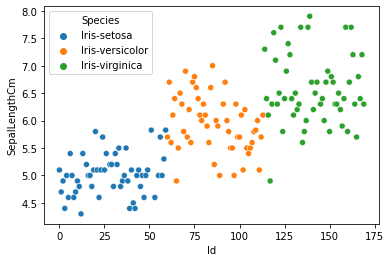

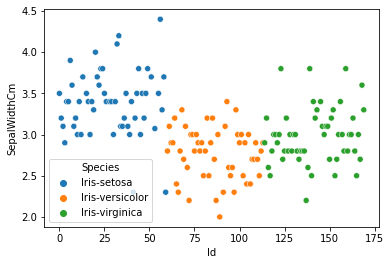

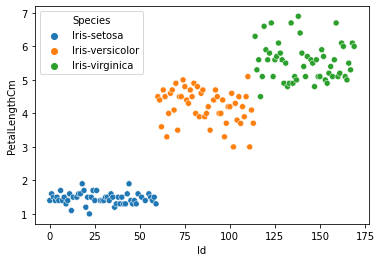

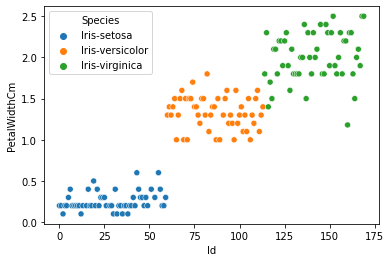

In [68]:
for column in data.columns[1:-1]:
    sns.scatterplot(data = data, x="Id", y=column, hue="Species")
    plt.show()

## Outlier 2: IQR Quantile

In [72]:
for column in data.columns[1:-1]:
    for spec in data["Species"].unique():
        selected_spec = data[data["Species"]==spec]
        selected_column = selected_spec[column]
        
        q1 = selected_column.quantile(0.25)
        q3 = selected_column.quantile(0.75)
        
        iqr=q3-q1
        
        minimum = q1 - 1.5*iqr
        maksimum = q3 + 1.5*iqr
        
        print(column,spec, "| min: ", minimum, "max: ", maksimum)
        
        max_indx = data[(data["Species"]==spec) & (data[column] > maksimum)].index
        print(max_indx)
        min_indx = data[(data["Species"]==spec) & (data[column] < minimum)].index
        print(min_indx)
        
        data.drop(index=max_indx, inplace=True)
        data.drop(index=min_indx, inplace=True)

SepalLengthCm Iris-setosa | min:  4.199999999999999 max:  5.800000000000001
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-versicolor | min:  4.549999999999999 max:  7.35
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalLengthCm Iris-virginica | min:  5.212499999999999 max:  7.912500000000001
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalWidthCm Iris-setosa | min:  2.4250000000000007 max:  4.225
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalWidthCm Iris-versicolor | min:  1.75 max:  3.75
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
SepalWidthCm Iris-virginica | min:  2.1999999999999993 max:  3.8000000000000007
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
PetalLengthCm Iris-setosa | min:  1.2499999999999998 max:  1.6500000000000001
Int64Index([6, 18, 24, 26, 44], dtype='int64')
Int64Index([12, 20, 36], dtype='int64')
PetalLengthCm Iris-versicolor | min:  2.8500000000000005

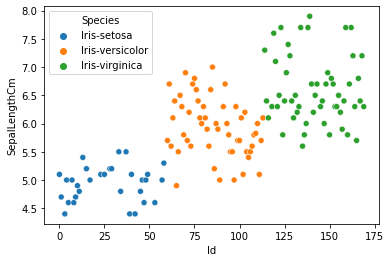

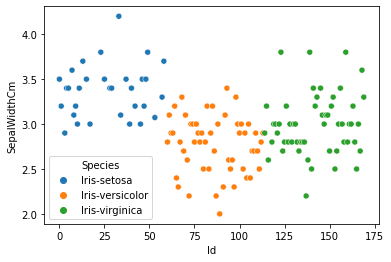

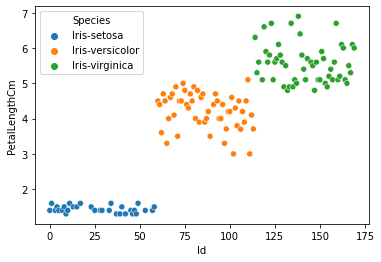

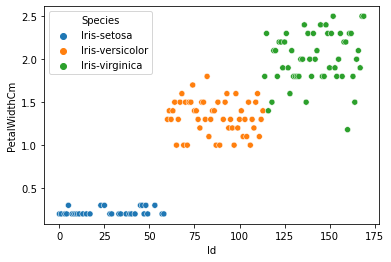

In [73]:
for column in data.columns[1:-1]:
    sns.scatterplot(data = data, x="Id", y=column, hue="Species")
    plt.show()

In [74]:
data.to_csv("final_data.csv")

## Label Encoding

In [76]:
# Modele verebilmek için Species'i sayısal değerlere ayırmamız gerekiyor

In [77]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [78]:
data = pd.read_csv("final_data.csv")

In [79]:
data.head()

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,1,4.7,3.2,1.6,0.2,Iris-setosa
2,3,3,4.4,2.9,1.4,0.2,Iris-setosa
3,4,4,5.0,3.4,1.5,0.2,Iris-setosa
4,5,5,4.6,3.4,1.4,0.3,Iris-setosa


In [80]:
data.drop(["Unnamed: 0","Id"],axis=1, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.7,3.2,1.6,0.2,Iris-setosa
2,4.4,2.9,1.4,0.2,Iris-setosa
3,5.0,3.4,1.5,0.2,Iris-setosa
4,4.6,3.4,1.4,0.3,Iris-setosa


In [81]:
#Label Encoding

In [82]:
le = LabelEncoder()

In [84]:
data["Species"] = le.fit_transform(data["Species"])

In [85]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.7,3.2,1.6,0.2,0
2,4.4,2.9,1.4,0.2,0
3,5.0,3.4,1.5,0.2,0
4,4.6,3.4,1.4,0.3,0


## Train - Test Split

In [88]:
# Veri Kontrolü

In [91]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [92]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [93]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.7,3.2,1.6,0.2,0
2,4.4,2.9,1.4,0.2,0
3,5.0,3.4,1.5,0.2,0
4,4.6,3.4,1.4,0.3,0


In [94]:
# Train-Test Split

In [95]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2)